### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


(1) What is the independent variable? What is the dependent variable?

In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
import scipy.stats as stats

data = pd.read_csv('stroopdata.csv')
data.head(3)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214


***The independent variable :*** The type of test ( congruent / incogruent )

***The dependent variable : *** The response time in second

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

We want to evaluate the effect on the performance of the participants and see whether the difference in our sample is because of the fact the congruent and incongruent test are significantly different.

μC : The congruent population's response time mean

μI : The incongruent population's response time mean

An appropriate set of hypotheses :

H0 : The null hypothesis, that the congruent and incongruent populations are not significantly different (μC − μI = 0)

HA : The alternative hypothesis, that the congruent and incongruent populations are significantly different (μC − μI ≠ 0)

In our case:

The sample size is below 30. (from stroop_data.info(1) (24 entries) )

The same participant is measured at two time points.

Therefore, we will conduct a Dependent t-test for Paired Samples.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [4]:
# Perform the analysis here
stroop_data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The congruent sample has a mean of x̄C = 14.051 seconds and a standard deviation σC = 3.559 seconds.

The incongruent sample has a mean of x̄I = 22.016 seconds and a standard deviation σI = 4.797 seconds.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0.5,1,'Line Plot of Stroop effect')

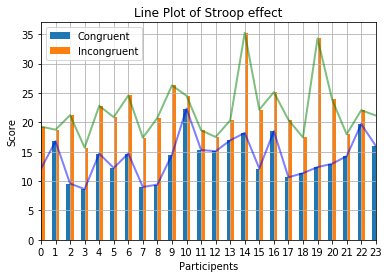

In [5]:
# Build the visualizations here
stroop_data.plot(kind='bar')
stroop_data.Congruent.plot(kind = 'line', color = 'b',label = 'Congruent',linewidth=2,alpha = 0.5,grid = True)
stroop_data.Incongruent.plot(color = 'g',label = 'Incongruent',linewidth=2, alpha = 0.5,grid = True)
plt.xlabel('Participents')              
plt.ylabel('Score')
plt.title('Line Plot of Stroop effect')

When plotting this area graph, all participants took longer to answer when tested on the incongruent way.

Text(0.5,1,'KDE of Stroop effect')

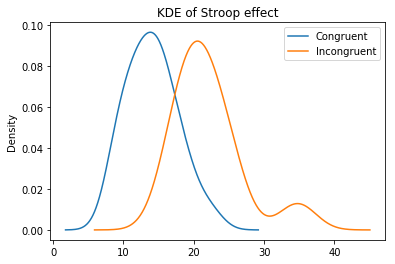

In [6]:
stroop_data.plot.kde()
plt.title('KDE of Stroop effect')

Both samples look normally distributed with a similar variance.
The incongruent task distribution of performance times seems to have a small peak around 35 seconds

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [8]:
# Calculte the mean of each test
mean_congurent = stroop_data['Congruent'].mean()
mean_incongurant = stroop_data['Incongruent'].mean()

# Calculte a point estimate using (mean_congurent - mean_incongurant) / Average of differences
estimate_point = mean_congurent - mean_incongurant

# Calculate Square of Sums of difference of sample means
ssd = sum( ( (stroop_data['Congruent'] - stroop_data['Incongruent']) - estimate_point ) ** 2  )

# Calculate the variance of difference
vd = ssd / (24 -1)

# Calculate Standard Deviation of Differences
sdd = vd ** (1/2)
############################################
# We can get this result easily using pandas std() 
# but before we have to add a column this way
# stroop_data['difference'] = stroop_data['Incongruent'] - stroop_data['Congruent']
# sdt = stroop_data.std()
# sdd = sdt['difference']
############################################

#  calculate the t-statistic for the difference
tstatistic = estimate_point / ( sdd / ( 24 ** (1/2) ) )

############################################
# We could find t-statistic easily importing stats from scipy.stats
# import scipy.stats as stats
# stats.ttest_rel(a = stroop_data['Congruent'], b = stroop_data['Incongruent'])
# Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)
# then we get the tstatistic  and the p value
############################################

# Calculate the Degrees of Freedom (n -1)
df = 23

# Calculte the chances of seeing a result as extreme as the one we observed (known as the p-value)
pvalue = stats.t.cdf(x = tstatistic, df = 23 ) * 2 

# Clacute t-critical for alpha level 0.005 (aiming to 99% confidence level)
alpha = 0.005
tcritical = stats.t.ppf(q=alpha, df=23)

print("Degrees of Freedom : df =", df)
print("Alpha- level : a =", alpha)
print("t-critical values :  tc  =", -tcritical, tcritical)
print("t-Statistic(df) : t(23) =", tstatistic)
print("p-value : p =", pvalue)

Degrees of Freedom : df = 23
Alpha- level : a = 0.005
t-critical values :  tc  = 2.80733568377 -2.80733568377
t-Statistic(df) : t(23) = -8.02070694411
p-value : p = 4.10300058571e-08


If the calculated t-statistic is greater than the critical t-value, the test concludes that there is a statistically significant difference between the two populations. Therefore, you reject the null hypothesis that there is no statistically significant difference between the two populations.

We observe that

The t-Statistic is clearly smaller than the negative t-critical value

In the critical region with a p-value < 0.0001

Therefore we reject the Null Hypothesis with a 99% Confidence level and conclude that there is a significant difference in the scores for congruent and incongruent tasks.

The results match up with our observations and expectations that there is indeed a statistically significant difference in the response time to perform the incongruent test compared to the congruent test.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

***References***

Wikipedia, https://en.wikipedia.org/wiki/Stroop_effect. Retrieved 2017-02-28

Lund Research Ltd. “Paired t-test using Stata”. statistics.laerd.com. Retrieved 2017-02-27.

Macleod, M. Colin, “The Stroop effect”,Encyclopedia of Color Science and Technology,1,2015.